# Unified Catches Correlator

Este notebook demuestra cómo usar la nueva clase unificada `CatchesCorrelator` para analizar correlaciones entre capturas y variables ambientales (SST, SSS, SSD).


In [2]:
# Importar la clase unificada
from unified_catches_correlator import CatchesCorrelator
import matplotlib.pyplot as plt

## 1. SST analysis

In [3]:
# Configurar directorios y archivos para SST
data_dir = "/home/jupyter-daniela/suyana/peru_production/outputs/"
sst_path = "/home/jupyter-daniela/suyana/sources/modis/sst/sst_anomaly_daily_2012_2024.nc"
shapefile_path = "/home/jupyter-daniela/suyana/geometries/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp"
bathymetry_path = "/home/jupyter-daniela/suyana/geometries/bathymetry/gebco_2024_n-3.2_s-19.4_w-84.6_e-67.8.nc"

# Crear instancia para SST
sst_correlator = CatchesCorrelator(data_dir, "sst")

# Ejecutar análisis completo
sst_correlator.load_catches_data("calas_grillado_semanal.csv")
sst_correlator.load_environmental_data(sst_path)
sst_correlator.preprocess_catches_data()
sst_correlator.preprocess_environmental_data()
sst_correlator.convert_xarray_to_dataframe()
sst_correlator.merge_datasets_catches_env()
sst_correlator.grouped_merged(step=2)
sst_correlator.correlate()

Filas en data: 372
         lat        lon  correlation  n_registros
0 -14.788881 -76.043951     0.146314           22
1 -14.704459 -76.123037    -0.198851           26
2 -14.622189 -76.207874    -0.009661           27
3 -14.622189 -76.123037     0.184471           26
4 -14.539045 -76.207874     0.003876           32


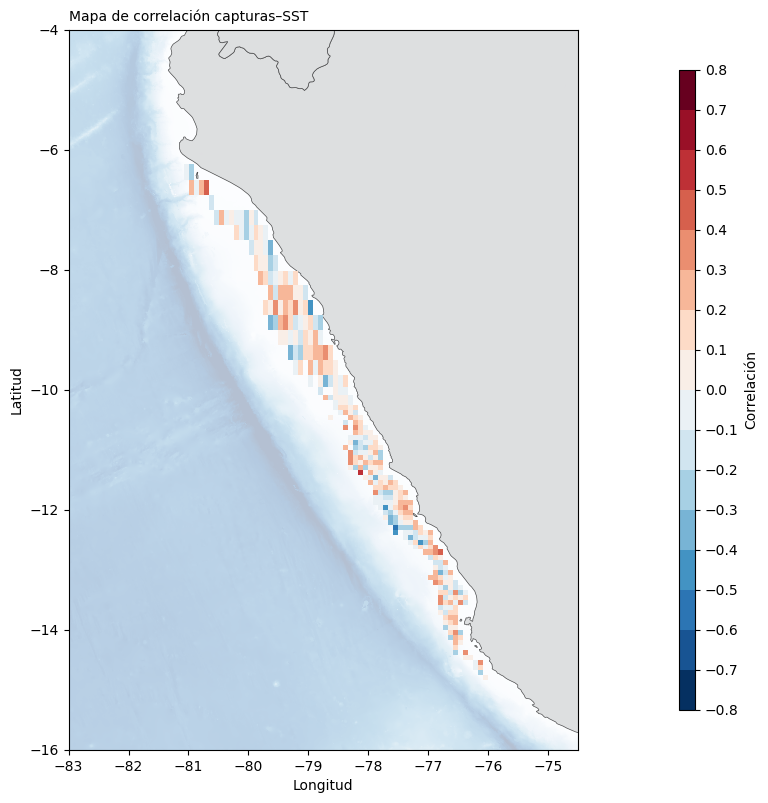

In [6]:
# Visualizar correlaciones SST
sst_correlator.visualizar_correlacion(
    shapefile_path=shapefile_path,
    bathymetry_path=bathymetry_path,
    mode="grid"
)

## 2. Análisis de SSS (Sea Surface Salinity)

In [7]:
# Configurar archivos para SSS
sss_path = "/home/jupyter-daniela/suyana/peru_production/features/OISSS_sss_weekly_2015-2024_4N_74W_16S_83W_0.25deg.nc"

# Crear instancia para SSS
sss_correlator = CatchesCorrelator(data_dir, "sss")

# Ejecutar análisis completo
sss_correlator.load_catches_data("calas_grillado_semanal_grilla_SSS.csv")
sss_correlator.load_environmental_data(sss_path)
sss_correlator.preprocess_catches_data()
sss_correlator.preprocess_environmental_data()
sss_correlator.convert_xarray_to_dataframe()
sss_correlator.merge_datasets_catches_env()
sss_correlator.grouped_merged(step=1)
sss_correlator.correlate()

Filas en data: 138
      lat     lon  correlation  n_registros
0 -15.125 -76.125    -0.062032           25
1 -15.125 -75.875     0.234275           32
2 -14.875 -76.375    -0.310514           32
3 -14.875 -76.125     0.008172           46
4 -14.625 -76.875    -0.305056           23


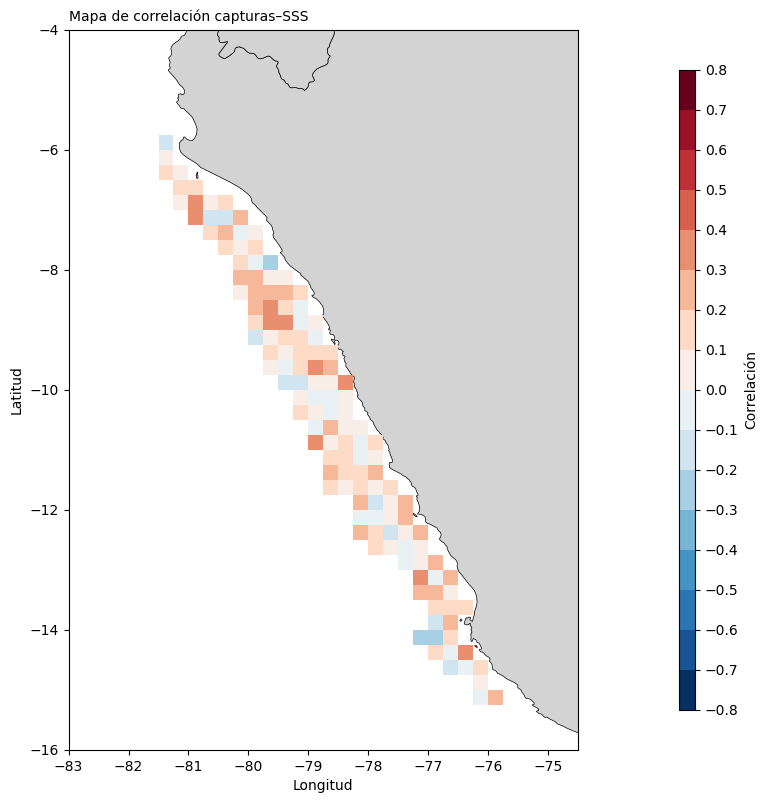

In [8]:
# Visualizar correlaciones SSS
sss_correlator.visualizar_correlacion(
    shapefile_path=shapefile_path,
    mode="grid"
)

## 3. Análisis de SSD (Sea Surface Density)

In [9]:
# Configurar archivos para SSD
ssd_path = "/home/jupyter-daniela/suyana/peru_production/features/SSD_weekly_anom_2015-2024_4N_74W_16S_83W_0.25deg.nc"

# Crear instancia para SSD
ssd_correlator = CatchesCorrelator(data_dir, "ssd")

# Ejecutar análisis completo
ssd_correlator.load_catches_data("calas_grillado_semanal_grilla_SSS.csv")
ssd_correlator.load_environmental_data(ssd_path)
ssd_correlator.preprocess_catches_data()
ssd_correlator.preprocess_environmental_data()
ssd_correlator.convert_xarray_to_dataframe()
ssd_correlator.merge_datasets_catches_env()
ssd_correlator.grouped_merged(step=1)
ssd_correlator.correlate()

Filas en data: 50
       lat     lon  correlation   p_value  significant  n_registros
1  -15.125 -75.875     0.234275  0.196850         True           32
2  -14.875 -76.375    -0.310514  0.083684         True           32
4  -14.625 -76.875    -0.305056  0.156948         True           23
10 -14.375 -76.375     0.322520  0.071811         True           32
12 -14.125 -76.875    -0.249942  0.090192         True           47


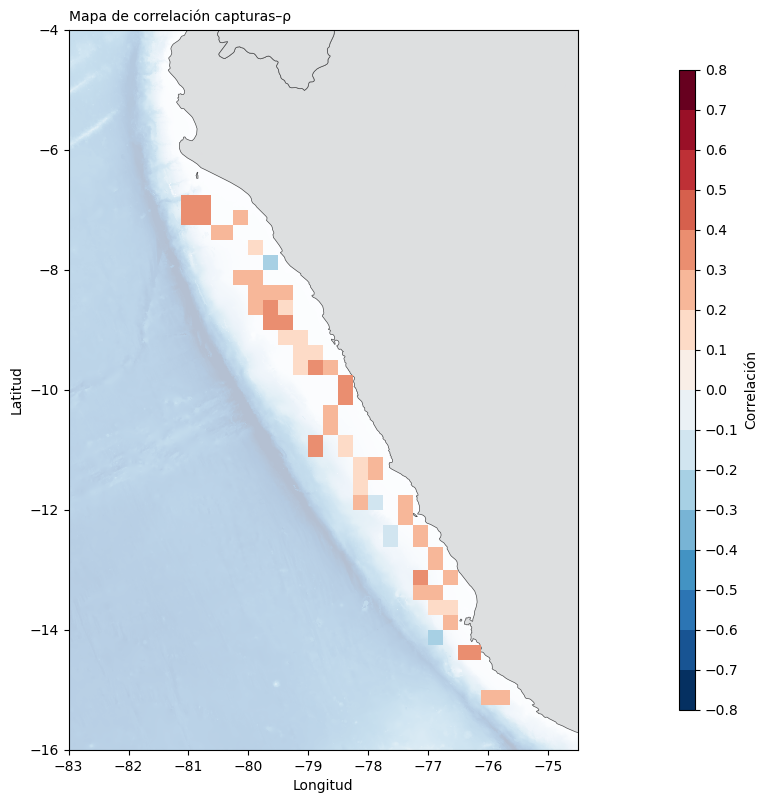

In [10]:
# Visualizar correlaciones SSD
ssd_correlator.visualizar_correlacion(
    shapefile_path=shapefile_path,
    bathymetry_path=bathymetry_path,
    mode="grid",
    if_significant=True
)

In [12]:
# Análisis beta espacial (disponible solo para SSD)
ssd_correlator.calcular_beta_espacial(if_significant=True, if_difference_catches=True)
ssd_correlator.visualizar_beta(
    shapefile_path=shapefile_path,
    bathymetry_path=bathymetry_path
)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>)

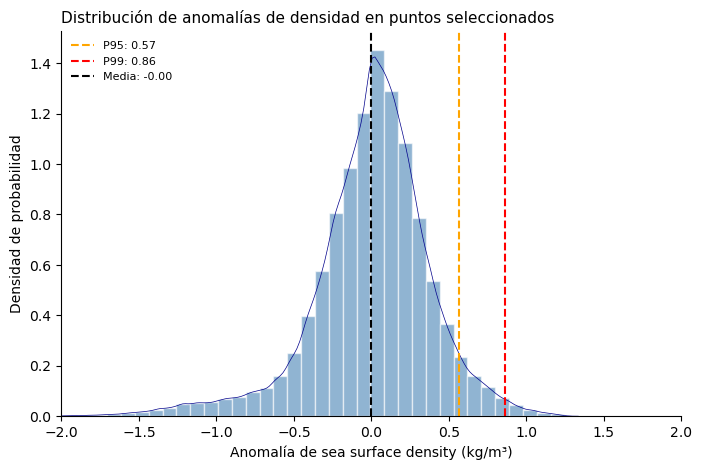

In [13]:
# Distribución de anomalías (disponible solo para SSD)
ssd_correlator.visualizar_distribucion_anomalias(
    if_significant=True, 
    bins=40, 
    show_kde=True
)

## 4. Comparación de Resultados

Ahora podemos fácilmente comparar los resultados entre las diferentes variables:

In [11]:
# Comparar estadísticas de correlación
print("=== RESUMEN DE CORRELACIONES ===")
print(f"SST: {len(sst_correlator.results)} puntos de correlación")
print(f"  - Correlación media: {sst_correlator.results['correlation'].mean():.3f}")
print(f"  - Correlación máxima: {sst_correlator.results['correlation'].max():.3f}")
print(f"  - Correlación mínima: {sst_correlator.results['correlation'].min():.3f}")

print(f"\nSSS: {len(sss_correlator.results)} puntos de correlación")
print(f"  - Correlación media: {sss_correlator.results['correlation'].mean():.3f}")
print(f"  - Correlación máxima: {sss_correlator.results['correlation'].max():.3f}")
print(f"  - Correlación mínima: {sss_correlator.results['correlation'].min():.3f}")

print(f"\nSSD: {len(ssd_correlator.results)} puntos de correlación")
print(f"  - Correlación media: {ssd_correlator.results['correlation'].mean():.3f}")
print(f"  - Correlación máxima: {ssd_correlator.results['correlation'].max():.3f}")
print(f"  - Correlación mínima: {ssd_correlator.results['correlation'].min():.3f}")
if 'significant' in ssd_correlator.results.columns:
    n_sig = ssd_correlator.results['significant'].sum()
    print(f"  - Correlaciones significativas: {n_sig} ({100*n_sig/len(ssd_correlator.results):.1f}%)")

=== RESUMEN DE CORRELACIONES ===
SST: 372 puntos de correlación
  - Correlación media: 0.088
  - Correlación máxima: 0.568
  - Correlación mínima: -0.493

SSS: 138 puntos de correlación
  - Correlación media: 0.089
  - Correlación máxima: 0.389
  - Correlación mínima: -0.553

SSD: 138 puntos de correlación
  - Correlación media: 0.089
  - Correlación máxima: 0.389
  - Correlación mínima: -0.553
  - Correlaciones significativas: 50 (36.2%)


In [ ]:
# Guardar resultados
sst_correlator.save_results("correlations_sst_unified.csv")
sss_correlator.save_results("correlations_sss_unified.csv")
ssd_correlator.save_results("correlations_ssd_unified.csv")

print("Resultados guardados exitosamente!")